In [1]:
# !pip install pandas
# !pip install geopandas
# !pip install matplotlib
# !pip install dbfread
# !pip install pyproj

In [18]:
from dbfread import DBF
from pyproj import CRS, Transformer
import pandas as pd
import geopandas as gpd

---

#### Shapefile

Contem dados geométricos.
Precisa da biblioteca geopandas para manitular os dados


In [ ]:
shapefile = gpd.read_file("CUSP_IN_PROGRESS/CUSP_IN_PROGRESS.shp")
shapefile.head()

,Status,Acquisitn,Type,geometry
0,In-Waiting,SC1801-CM-N,CM,"POLYGON ((-79.04048 33.7138, -79.04562 33.6915..."
1,Intended,WA1803-CM-N,CM,"MULTIPOLYGON (((-123.03763 48.99952, -123.0376..."
2,Potential,WA19A - Oute,CM,"POLYGON ((-124.65259 48.39105, -124.63684 48.3..."
3,Potential,WA19B - Colu,CM,"POLYGON ((-124.00725 46.26307, -123.9778 46.30..."
4,In-Waiting,TX1901-CM-N,CM,"POLYGON ((-97.24819 27.92284, -97.24217 27.913..."


In [ ]:
# Salvar em um arquivo CSV, mais simples de vizualizar os dados
df_shapefile = pd.DataFrame(shapefile)
df_shapefile.to_csv("shapefile.csv")
df_shapefile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Status     91 non-null     object  
 1   Acquisitn  91 non-null     object  
 2   Type       91 non-null     object  
 3   geometry   91 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 3.0+ KB


In [5]:
shapefile.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

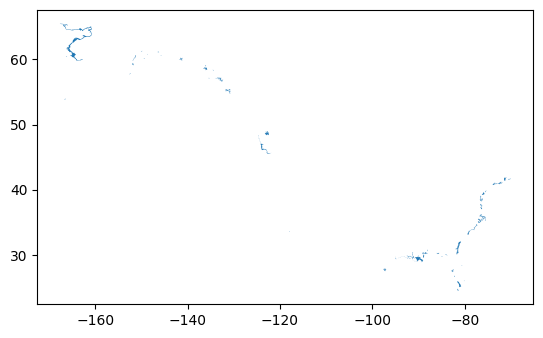

In [6]:
shapefile.plot()

---

#### DataBase File

Para ler o arquivo '.dbf' será usado o pandas e o dbfread.


In [7]:
dado_tabulados = DBF("CUSP_IN_PROGRESS/CUSP_IN_PROGRESS.dbf")
df_dados_tabulados = pd.DataFrame(dado_tabulados)
df_dados_tabulados.info()
df_dados_tabulados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Status     91 non-null     object
 1   Acquisitn  91 non-null     object
 2   Type       91 non-null     object
dtypes: object(3)
memory usage: 2.3+ KB


,Status,Acquisitn,Type
0,In-Waiting,SC1801-CM-N,CM
1,Intended,WA1803-CM-N,CM
2,Potential,WA19A - Oute,CM
3,Potential,WA19B - Colu,CM
4,In-Waiting,TX1901-CM-N,CM


Tanto o arquivo '.shp' quanto '.dbf' possuem 91 linhas, todas preenchidas


In [ ]:
df_comum_shp = df_shapefile[["Status", "Acquisitn", "Type"]]
df_comum_shp["origem"] = "ShapeFile"
df_comum_dbf = df_dados_tabulados[["Status", "Acquisitn", "Type"]]
df_comum_dbf["origem"] = "DataBaseFile"
df_comum_dbf_shp = pd.concat([df_comum_dbf, df_comum_shp])
df_comum_dbf_shp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 90
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Status     182 non-null    object
 1   Acquisitn  182 non-null    object
 2   Type       182 non-null    object
 3   origem     182 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


In [9]:
df_comum_dbf_shp["chave"] = (
    df_comum_dbf_shp["Status"]
    + "-"
    + df_comum_dbf_shp["Acquisitn"]
    + "-"
    + df_comum_dbf_shp["Type"]
)
df_comum_dbf_shp.info()
df_comum_dbf_shp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 90
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Status     182 non-null    object
 1   Acquisitn  182 non-null    object
 2   Type       182 non-null    object
 3   origem     182 non-null    object
 4   chave      182 non-null    object
dtypes: object(5)
memory usage: 8.5+ KB


,Status,Acquisitn,Type,origem,chave
0,In-Waiting,SC1801-CM-N,CM,DataBaseFile,In-Waiting-SC1801-CM-N-CM
1,Intended,WA1803-CM-N,CM,DataBaseFile,Intended-WA1803-CM-N-CM
2,Potential,WA19A - Oute,CM,DataBaseFile,Potential-WA19A - Oute-CM
3,Potential,WA19B - Colu,CM,DataBaseFile,Potential-WA19B - Colu-CM
4,In-Waiting,TX1901-CM-N,CM,DataBaseFile,In-Waiting-TX1901-CM-N-CM


In [10]:
df_comum_dbf_shp = df_comum_dbf_shp.drop_duplicates(subset="chave")
df_comum_dbf_shp.info()
df_comum_dbf_shp.head()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 90
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Status     87 non-null     object
 1   Acquisitn  87 non-null     object
 2   Type       87 non-null     object
 3   origem     87 non-null     object
 4   chave      87 non-null     object
dtypes: object(5)
memory usage: 4.1+ KB


,Status,Acquisitn,Type,origem,chave
0,In-Waiting,SC1801-CM-N,CM,DataBaseFile,In-Waiting-SC1801-CM-N-CM
1,Intended,WA1803-CM-N,CM,DataBaseFile,Intended-WA1803-CM-N-CM
2,Potential,WA19A - Oute,CM,DataBaseFile,Potential-WA19A - Oute-CM
3,Potential,WA19B - Colu,CM,DataBaseFile,Potential-WA19B - Colu-CM
4,In-Waiting,TX1901-CM-N,CM,DataBaseFile,In-Waiting-TX1901-CM-N-CM


Tanto o df_shapefile quanto o df_dados_tabulados trazem as mesmas informações e em relação as colunas 'Status', 'Acquisitn', 'Type'
também temos 2 valores duplicados na mesma tabela, a qual será revisado se a combinação de 'Status', 'Acquisitn', 'Type' seria a uníca duplicidade ou o conteúdo na coluna 'geometry' também se repete


In [ ]:
# Verificar duplicidades considerando todas as colunas
duplicates_with_geometry = df_shapefile.duplicated(
    subset=["Status", "Acquisitn", "Type", "geometry"]
)

print(f"Número de duplicados considerando 'geometry': {duplicates_with_geometry.sum()}")

# Verificar duplicidades nas colunas não-geométricas
duplicates_non_geometry = df_shapefile.duplicated(
    subset=["Status", "Acquisitn", "Type"]
)
print(
    f"Número de duplicados sem considerar 'geometry': {duplicates_non_geometry.sum()}"
)

# Verificar identificador se existe um código único
duplicates_in_acquisitn = df_shapefile.duplicated(subset=["Acquisitn"])
print(f"Número de duplicados em 'acquisitin': {duplicates_in_acquisitn.sum()}")

Número de duplicados considerando 'geometry': 0
Número de duplicados sem considerar 'geometry': 4
Número de duplicados em 'acquisitin': 4


A duplicidade está na combinação das colunas 'Status', 'Acquisitn' e 'Type', a informação presente na coluna 'geometry' é diferente


---

#### arquivo .prj


In [ ]:
with open("CUSP_IN_PROGRESS/CUSP_IN_PROGRESS.prj", "r") as file:
    prj_text = file.read()

# Converter para CRS
crs = CRS.from_wkt(prj_text)
print(crs)

# CRS destino (WGS84)
crs_wgs84 = CRS.from_epsg(4326)  # EPSG:4326 para WGS84

# Criar o transformer
transformer = Transformer.from_crs(crs, crs_wgs84, always_xy=True)

# Coordenadas no CRS NAD83 (exemplo: longitude, latitude)
lon_nad83, lat_nad83 = -100.123456, 40.987654

# Converter para WGS84
lon_wgs84, lat_wgs84 = transformer.transform(lon_nad83, lat_nad83)

# Exibir o resultado
print(f"Coordenadas NAD83: ({lon_nad83}, {lat_nad83})")
print(f"Coordenadas WGS84: ({lon_wgs84}, {lat_wgs84})")

GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]
Coordenadas NAD83: (-100.123456, 40.987654)
Coordenadas WGS84: (-100.123456, 40.987654)


In [13]:
shapefile.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [14]:
shapefile_wgs84 = shapefile.to_crs("EPSG:4326")
shapefile_wgs84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

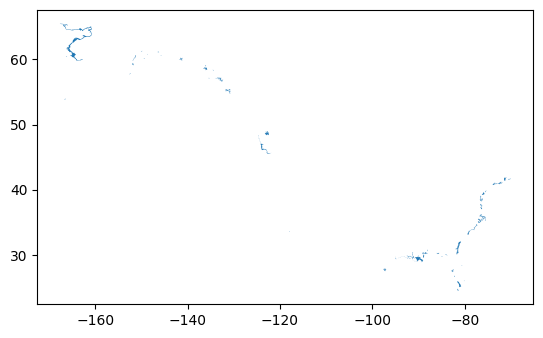

In [15]:
shapefile_wgs84.plot()

---

#### Arquivo .shx


In [ ]:
indice_formas_geometricas = gpd.read_file("CUSP_IN_PROGRESS/CUSP_IN_PROGRESS.shx")
indice_formas_geometricas.geometry.info()
indice_formas_geometricas.geometry.head()

<class 'geopandas.geoseries.GeoSeries'>
RangeIndex: 91 entries, 0 to 90
Series name: geometry
Non-Null Count  Dtype   
--------------  -----   
91 non-null     geometry
dtypes: geometry(1)
memory usage: 860.0 bytes


0    POLYGON ((-79.04048 33.7138, -79.04562 33.6915...
1    MULTIPOLYGON (((-123.03763 48.99952, -123.0376...
2    POLYGON ((-124.65259 48.39105, -124.63684 48.3...
3    POLYGON ((-124.00725 46.26307, -123.9778 46.30...
4    POLYGON ((-97.24819 27.92284, -97.24217 27.913...
Name: geometry, dtype: geometry